# I. Perkenalan

Nama: Wenny Chandra Sari

Batch: 15

Objective: Buatlah model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan.

Query Dataset:
```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.heart-failure`;
```

About Dataset:

<img src='https://camo.githubusercontent.com/74367182fd06603b4568da9dba93c9483897646c50c55aa6392a68e99996d086/68747470733a2f2f692e6962622e636f2f594247774d586d2f50312d47332d446174617365742d496e666f726d6174696f6e2e706e67'>

Reference: -

# II. Import Libraries

In [63]:
# kolom lib

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# pre/scaling/encode lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler  # data skew

# clasification lib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# classification evaluation lib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# searchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# unbalance dataset
from imblearn.over_sampling import SMOTE

# basic syntax
pd.set_option('display.Max_columns',None)
warnings.filterwarnings('ignore')

# II. Data Loading

In [64]:
# load dataset
data_o = pd.read_csv('h8dsft_P1G3_wennychandrasari.csv')

# copy dataset
data = data_o.copy()

# check the first 5 data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [65]:
# check the last 5 data

data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [66]:
# rename anaemia

data = data.rename({'anaemia':'anemia'}, axis=1)

In [67]:
# check nunique of every columns

data.nunique()

age                          47
anemia                        2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [68]:
# check null rows

data.isnull().sum()

age                         0
anemia                      0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [69]:
# check column type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [70]:
# change column type

data.age = data.age.astype(int)

# caling dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


---
Statement:
- Dataset terdiri atas 299 baris dan 12 kolom.
- Dataset terdiri atas 2 tipe float64 dan 11 int64.
- Dataset tidak memiliki missing values.

# IV. Exploratory Data Analysis (EDA)

Melihat keseimbangan dari target Dataset:

In [71]:
# check dataset target

data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [72]:
# check percentage of dataset target

data.DEATH_EVENT.value_counts() / data.DEATH_EVENT.count() * 100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

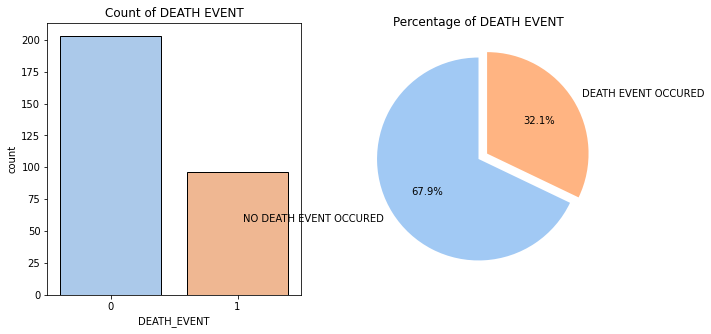

In [73]:
# plot

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=data, x='DEATH_EVENT', palette='pastel', edgecolor = 'black')
plt.xlabel('DEATH_EVENT')
plt.title('Count of DEATH EVENT')

plt.subplot(1,2,2)
plt.pie(data.DEATH_EVENT.value_counts(), labels = ['NO DEATH EVENT OCCURED', 'DEATH EVENT OCCURED'], startangle=90,
        explode = (0, 0.1), autopct='%1.1f%%', colors = sns.color_palette('pastel',8))
plt.title('Percentage of DEATH EVENT')

plt.show()

---
Statement:

Dataset tergolong dataset yang imbalance dengan perbandingan kategori 1 dengan keseluruhan dataset sebesar 32%. Kemungkinan data akan bias terhadap kasus DEATH_EVENT berkategori 1.

In [74]:
# check relationship between all feature

X = pd.get_dummies(data).corr()
X.style.background_gradient(cmap='coolwarm')

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.065546,0.018926,-0.224265,0.253581
anemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065546,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


---
Statement:

Berdasarakan cmap kita melihat Target memiliki hubungan yang tidak terlalu besar dengan semua kolom. Hubungan yang cukup kuat ( <= -0.1 atau >0.1) adalah dengan kolom __'age', 'ejection_fraction', 'serum_creatine', 'serum_sodium', dan 'time'__.

In [75]:
# show columns

data.columns

Index(['age', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [76]:
# spliting dataset for EDA visualisation

dat_cat = ['anemia','diabetes','high_blood_pressure','sex', 'smoking']
dat_num = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
dat_target = ['DEATH_EVENT']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

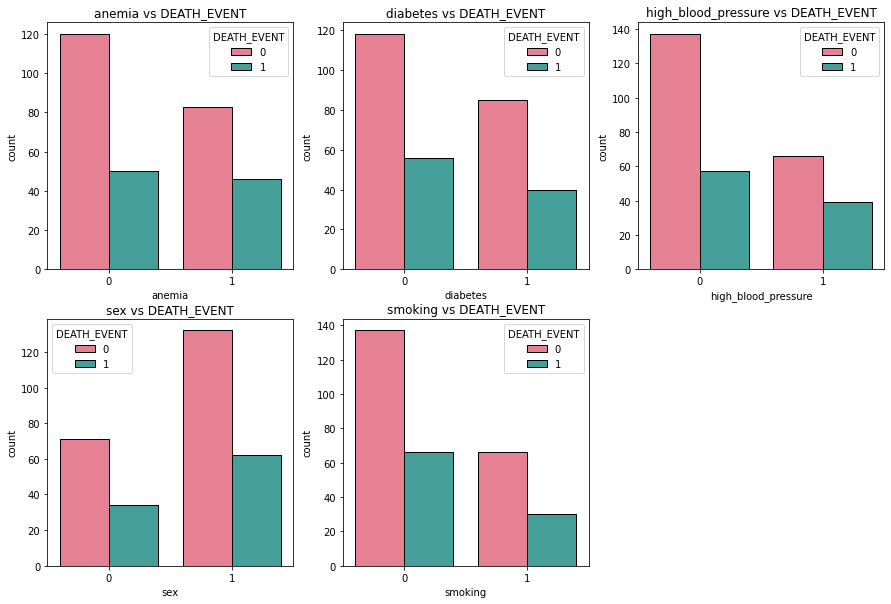

In [77]:
# relationship between categorical column and DEATH_EVENT

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,10))
for i in range(len(dat_cat)):
    plt.subplot(2,3,i+1)
    sns.countplot(dat_cat[i],data = data,hue = "DEATH_EVENT",palette = 'husl',edgecolor = 'black')
    title = dat_cat[i] + ' vs DEATH_EVENT'
    plt.title(title);


---
Statement:

- Pasien dengan negatif anemia, diabetes, high blood pressure, dan smoking mengalami tingkat kematian akibat gagal jantung yang lebih rendah dibandingkan pasien yang positif anemia, diabetes, high blood pressure, dan smoking. Hubungan antara ke 4 kolom tersebut dengan kematian akibat gagal jantung adalah negatif.

- Pasien pria yang meninggal akibat gagal jantung lebih banyak daripada pasien wanita.

In [78]:
# show columns

data.columns

Index(['age', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

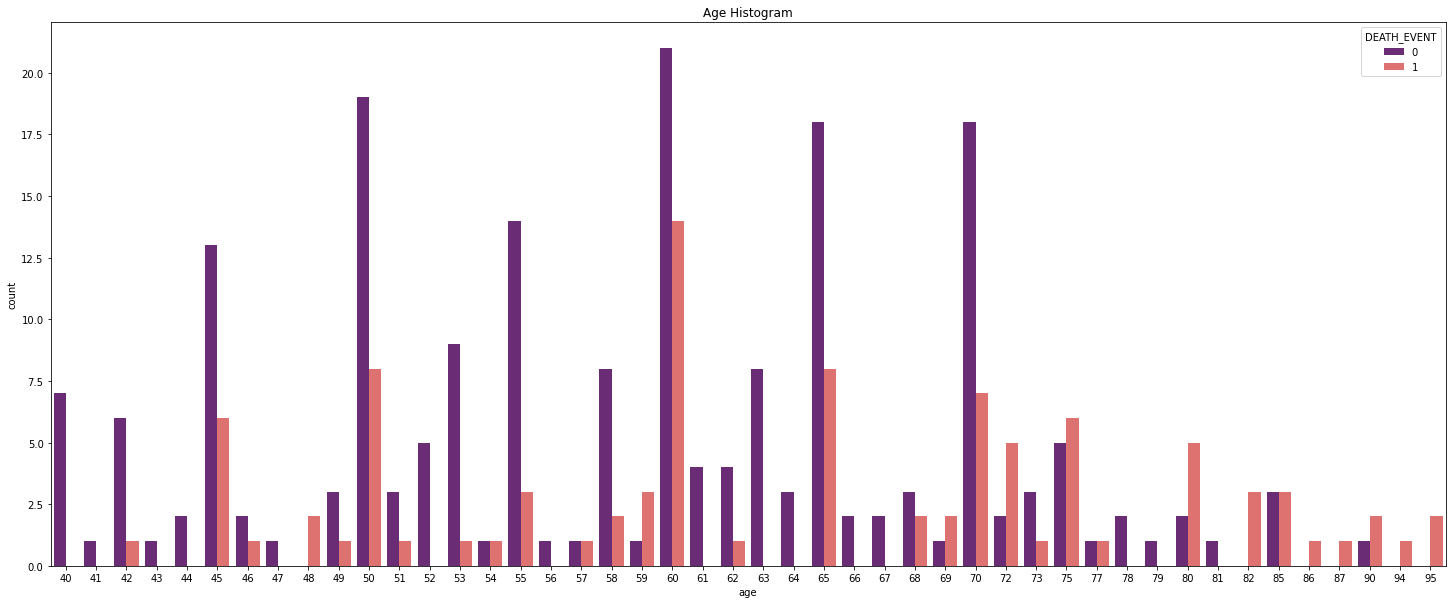

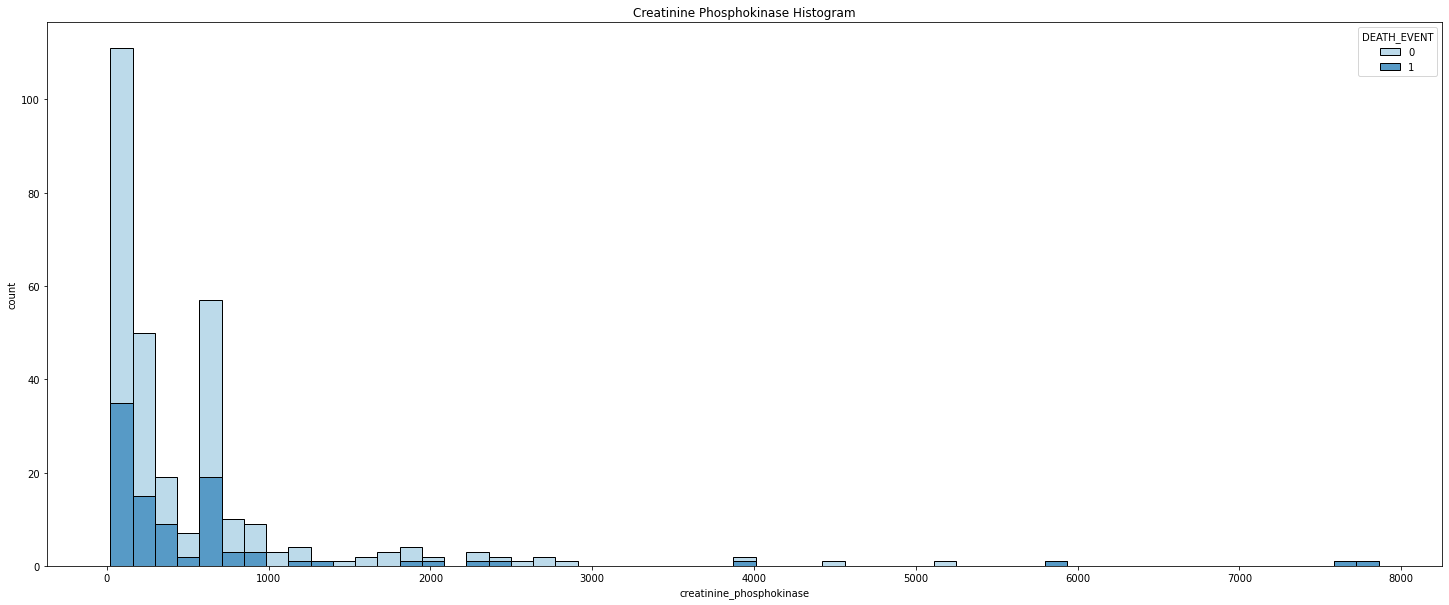

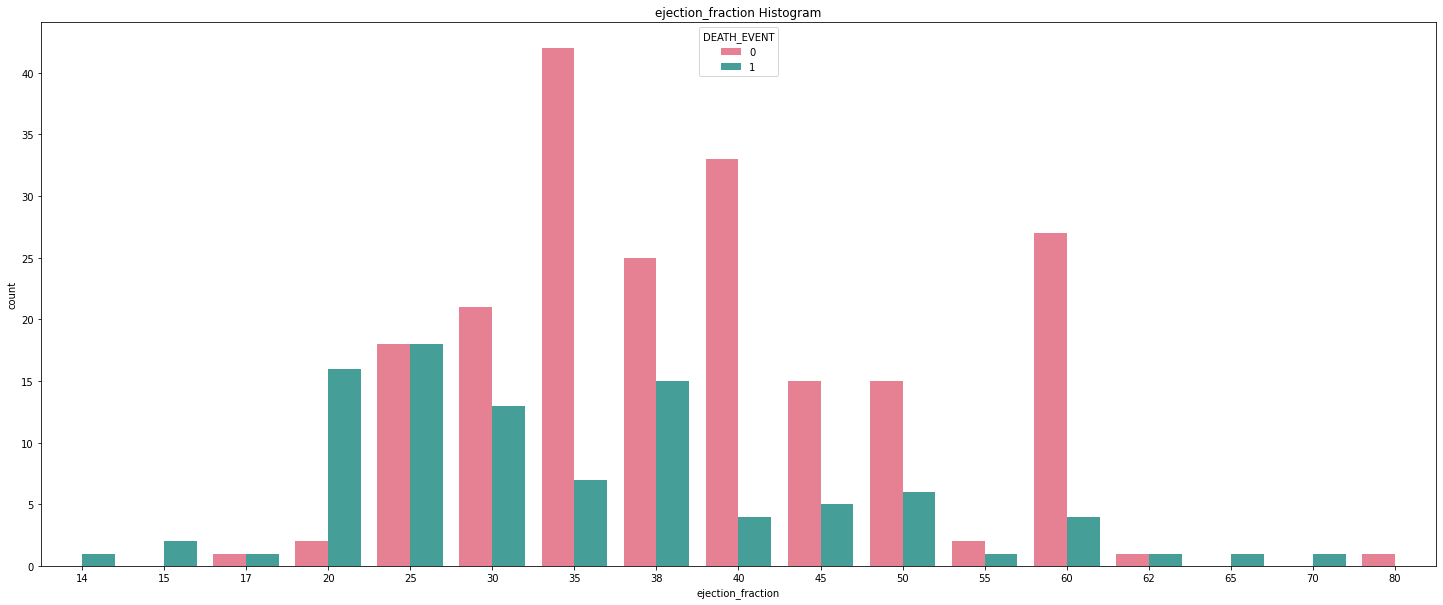

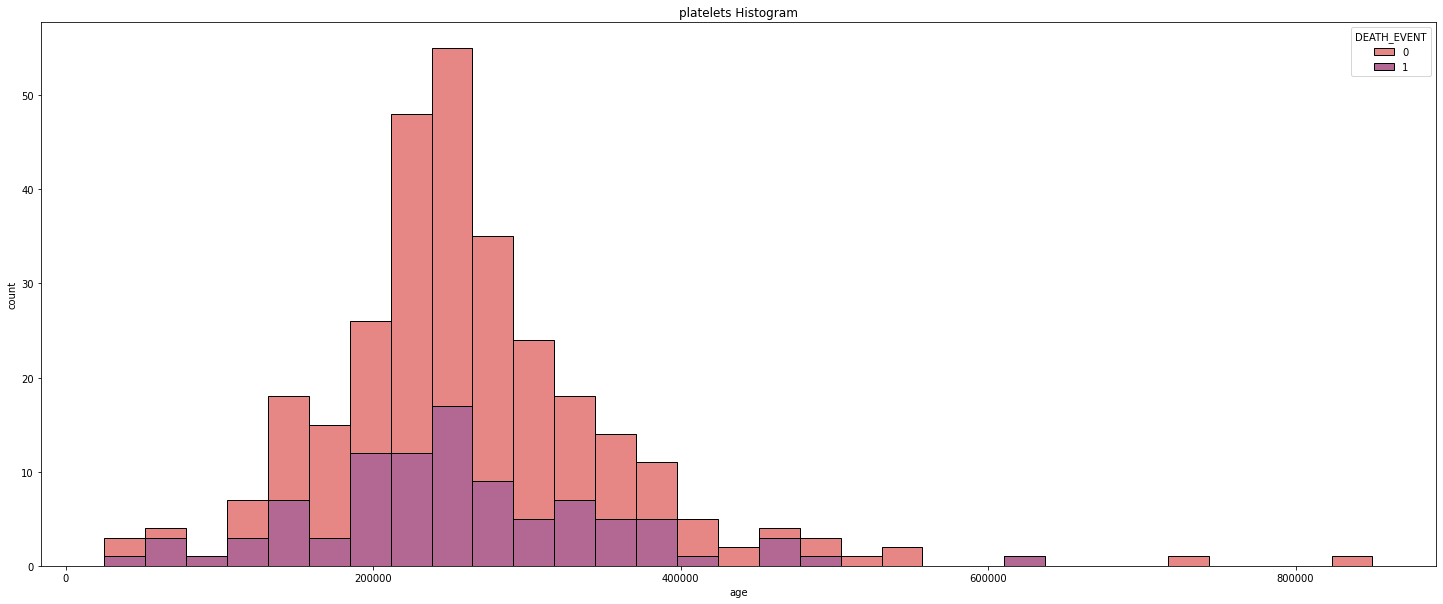

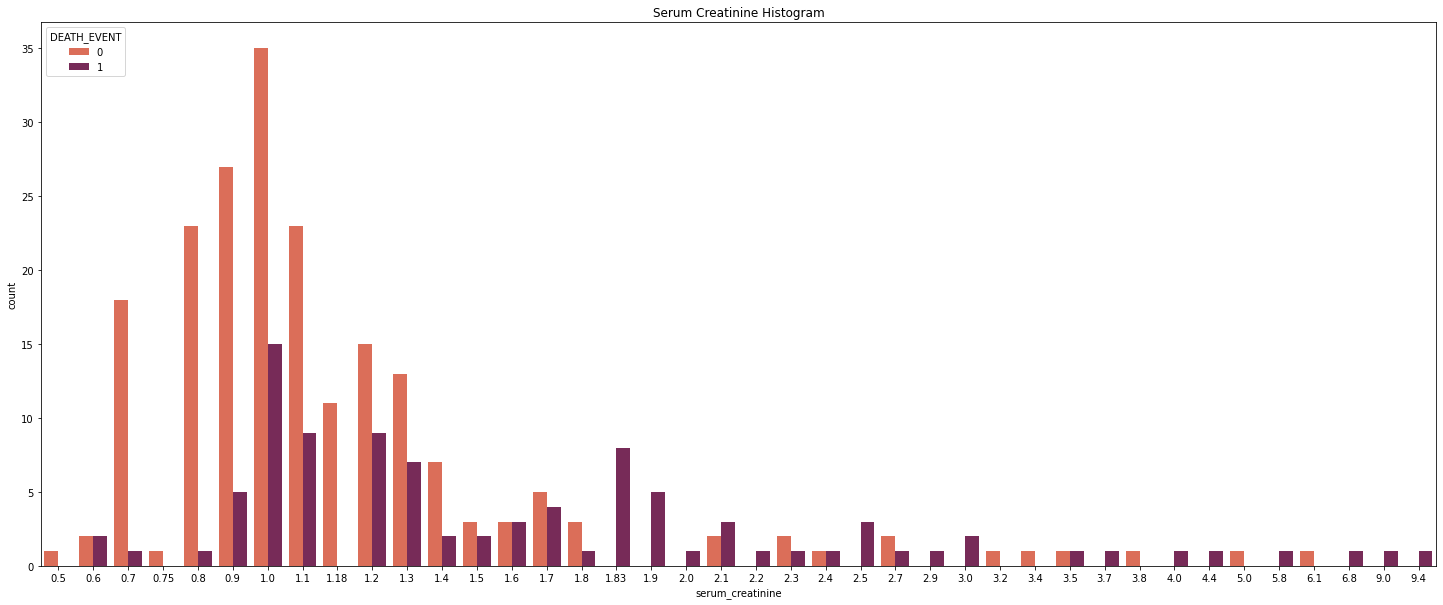

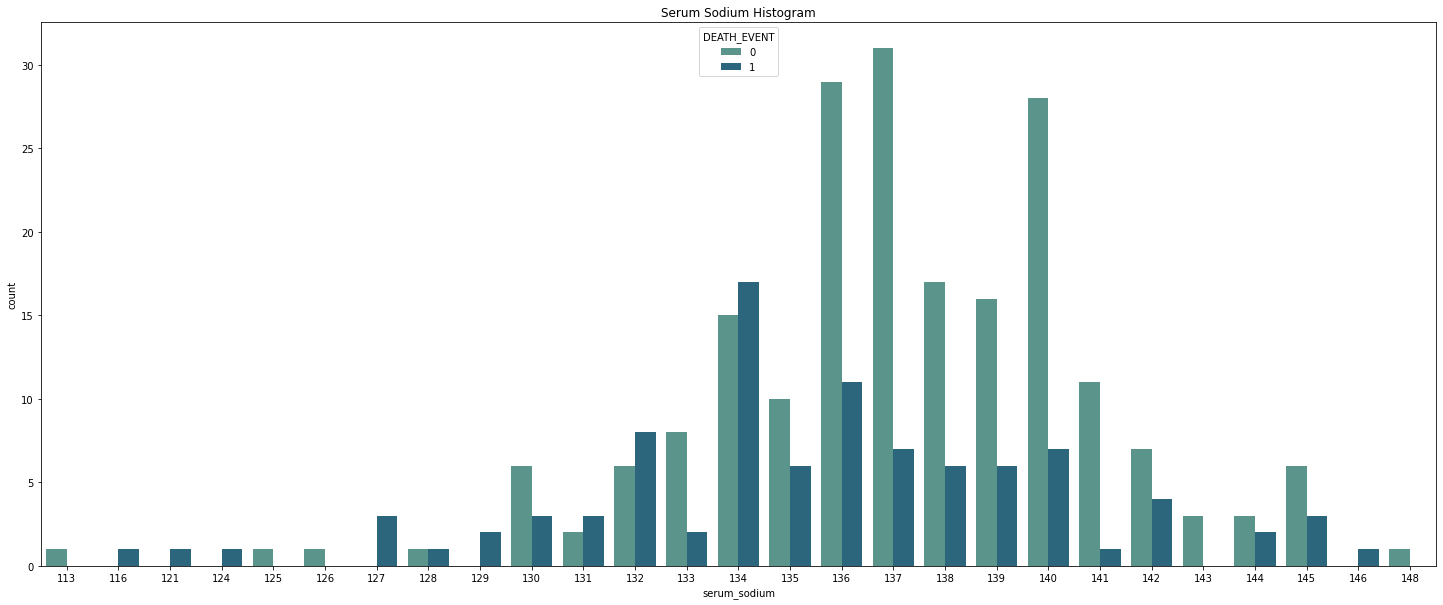

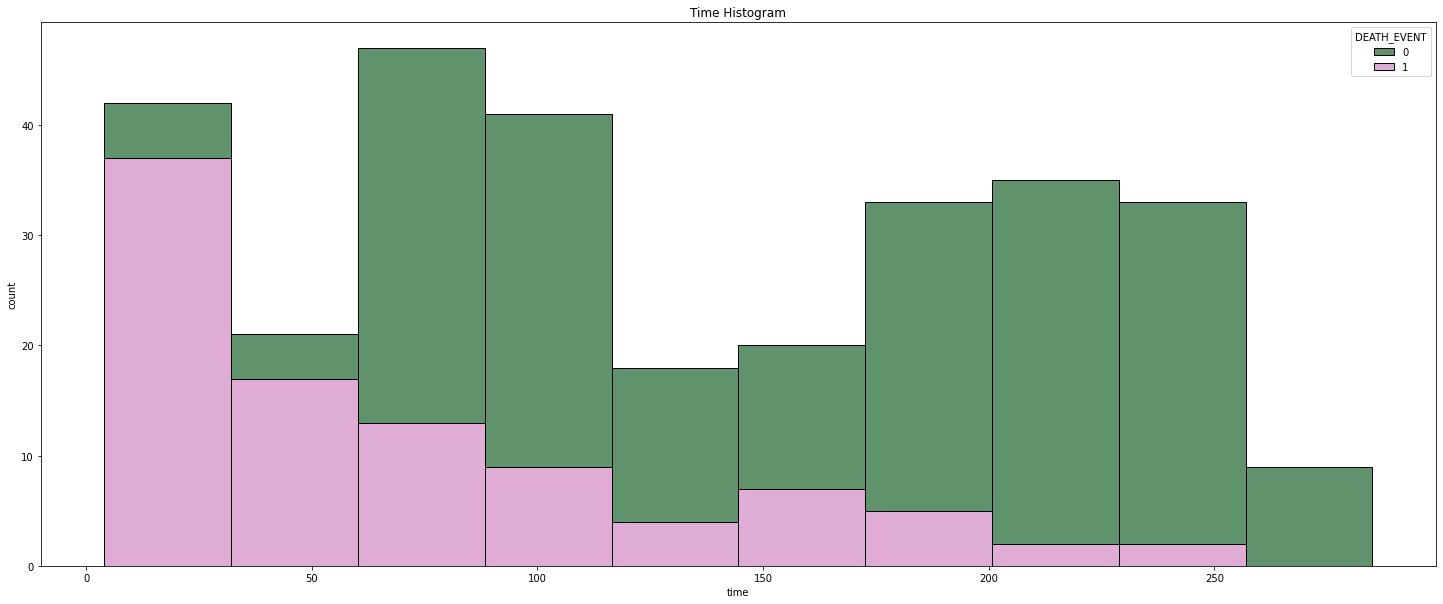

In [79]:
# hist age

plt.figure(figsize=(25,10))
sns.countplot(data=data, x='age', hue='DEATH_EVENT', palette= 'magma')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Histogram')

# hist creatinine_phosphokinase

plt.figure(figsize=(25,10))
sns.histplot(data=data, x='creatinine_phosphokinase', hue='DEATH_EVENT', multiple='stack', palette= 'Paired', legend=True)
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('count')
plt.title('Creatinine Phosphokinase Histogram')

# hist ejection_fraction
plt.figure(figsize=(25,10))
sns.countplot(data=data, x='ejection_fraction', hue='DEATH_EVENT', palette='husl')
plt.xlabel('ejection_fraction')
plt.ylabel('count')
plt.title('ejection_fraction Histogram')

# hist platelets
plt.figure(figsize=(25,10))
sns.histplot(data=data, x='platelets', hue='DEATH_EVENT', multiple='stack', palette= 'flare', legend=True)
plt.xlabel('age')
plt.ylabel('count')
plt.title('platelets Histogram')

# hist serum_creatinine
plt.figure(figsize=(25,10))
sns.countplot(data=data, x='serum_creatinine', hue='DEATH_EVENT', palette= 'rocket_r')
plt.xlabel('serum_creatinine')
plt.ylabel('count')
plt.title('Serum Creatinine Histogram')

# hist serum_sodium
plt.figure(figsize=(25,10))
sns.countplot(data=data, x='serum_sodium', hue='DEATH_EVENT', palette= 'crest')
plt.xlabel('serum_sodium')
plt.ylabel('count')
plt.title('Serum Sodium Histogram')

# hist time
plt.figure(figsize=(25,10))
sns.histplot(data=data, x='time', hue='DEATH_EVENT',  multiple='stack', palette= 'cubehelix')
plt.xlabel('time')
plt.ylabel('count')
plt.title('Time Histogram')

plt.show()

---
Statement:
- Pasien dengan usia 60 tahun ke atas memiliki tingkat kematian karena gagal jantung yang tinggi. __Nilai dari kolom ini memiliki pengaruh terhapap kolom DEATH EVENT.__
- Creatinine Phosphokinase (CPK) adalah enzim yang penting untuk fungsi otot. Nilai normal dari enzim ini adalah 52 - 336 U/L. Histogram memperlihatkan pasien dengan nilai CPK dibawah 600 banyak mengalami kematian karena gagal jantung. __Nilai dari kolom ini tidak terlalu memiliki pengaruh dengan kolom DEATH EVENT.__ 
- Ejection Fraction mengukur kemampuan jantung memompa darah yang kaya akan oksigen ke tubuh. Jantung yang sehat memiliki nilai Fraction yang tinggi. Nilai Fraction yang rendah menandakan jantung Anda sulit memenuhi kebutuhan darah dan oksigen tubuh. Anda memiliki risiko gagal jantung. Rasio Ejection Fraction dari jantung yang sehat adalah 50-70% darah dari ventrikel kiri jantung terpompa ke tubuh. __Nilai dari kolom ini memiliki pengaruh kepada kolom DEATH EVENT.__
- Platelet adalah sel yang beredar pada darah kita dan mengikatkan diri ketika mereka mengenali pembuluh darah yang rusak. Nilai normal dari platelet adalah 150,000 s/d 400,000. Nilai platelet di bawah 150,000 disebut thrombocytosis, dan nilai platelet di atas 400,000 disebut thrombocytopenia. Nilai platelet yang terlalu tinggi dapat menyebabkan struk dan serangan jantung. __Nilai dari kolom ini memiliki pengaruh kepada kolom DEATH EVENT.__
- Creatinine Serum adalah level creatinine dalam darah atau urine. Serum ini adalah pembuangan dari aktifitas otot. Nilai normal creatinine serum adalah 0.7-1.3 mg/dL untuk laki-laki dan 0.6-1.1 mg/dL untuk perempuan. Nilai creatinine yang tingi pada darah dan rendah pada urine mengindikasi penyakit ginjal dan juga kegagalan jantung. __Nilai dari kolom ini memiliki pengaruh kepada kolom DEATH EVENT.__
- Serum sodium adalah tipe elektrolit (elektrically charged minerals) yang membantu mengontrol jumlah cairan dan menyeimbangkan pH balance (asam dan basa) di tubuh. Rata-rata nilai sodium dalam darah adalah 135-145 miliequivalents per Liter (mEq/L). Serum sodium yang rendah dapat menyebabkan gagal jantung. __Nilai dari kolom ini memiliki pengaruh kepada kolom DEATH EVENT.__
- Waktu kujungan selanjutnya memperlihatkan semakin cepat waktu kunjungan berikutnya, semakin besar kematian akibat gagal jantung. __Nilai dari kolom ini memiliki pengaruh kepada kolom DEATH EVENT.__

Another graph:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


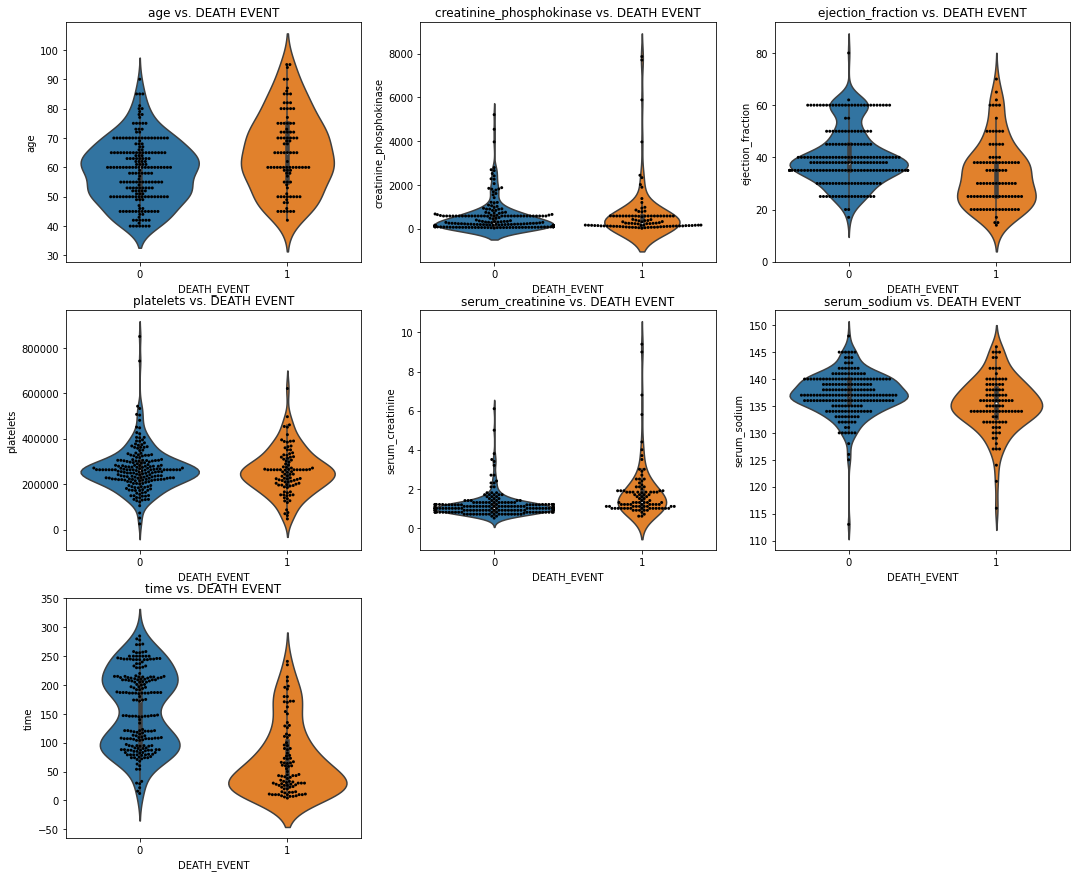

In [80]:
# check relationship between numerical columns and DEATH EVENT

plt.figure(figsize=(18,15))

for i in range(7):
  plt.subplot(3,3,i+1)
  g = sns.violinplot(data=data, x='DEATH_EVENT', y=dat_num[i])
  sns.swarmplot(data=data, x="DEATH_EVENT", y=dat_num[i], color="k", size=3, ax=g)
  title = dat_num[i] + ' vs. DEATH EVENT'
  plt.title(title)

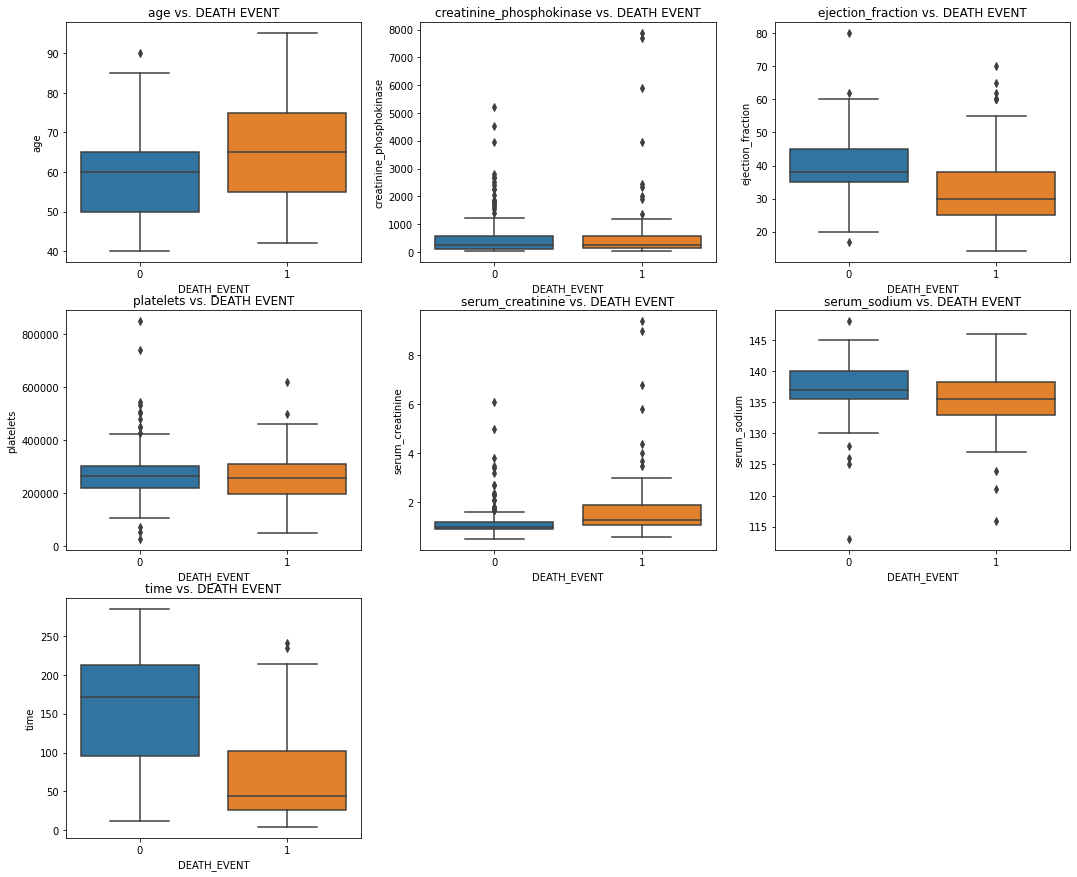

In [81]:
# check relationship between numerical columns and DEATH EVENT

plt.figure(figsize=(18,15))

for i in range(7):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=data, x='DEATH_EVENT', y=dat_num[i])
  title = dat_num[i] + ' vs. DEATH EVENT'
  plt.title(title)

In [82]:
# Mencari 2 kolom kategorikal menggunakan chi square:

# contingency_table1=pd.crosstab(df['Attrition'],df["WorkLifeBalance"])
# contingency_table1

# stat, p, dof, expected = stats.chi2_contingency(contingency_table1)
# print('p=%.3f' % (p))
# if p > 0.05:
#     print('Probably independent')
# else:
#     print('Probably dependent')

---
Statement:
- Berdasarkan EDA kolom 'age' memiliki hubungan dengan DEATH_EVENT. Pasien dengan usia 60 tahun ke atas memiliki tingkat kematian karena gagal jantung
- Berdasarkan EDA kolom 'ejection_fraction' memiliki hubungan dengan DEATH_EVENT. Nilai Fraction yang rendah dari 50-70% menandakan jantung Anda sulit memenuhi kebutuhan darah dan oksigen tubuh. Anda memiliki risiko gagal jantung.
- Berdasarkan EDA kolom 'platelets' memiliki hubungan dengan DEATH_EVENT'. Nilai normal adalah 150,000 s/d 400,000. Nilai platelet yang terlalu tinggi dapat menyebabkan struk dan serangan jantung. 
- Berdasarkan EDA kolom 'serum_creatine' memiliki hubungan dengan DEATH_EVENT. Nilai creatinine yang tingi pada darah dan rendah pada urine mengindikasi penyakit ginjal dan juga kegagalan jantung. Nilai normal creatinine serum adalah 0.7-1.3 mg/dL untuk laki-laki dan 0.6-1.1 mg/dL untuk perempuan.
- Berdasarkan EDA kolom 'serum_sodium' memiliki hubungan dengan DEATH_EVENT. Serum sodium yang rendah dapat menyebabkan gagal jantung. Rata-rata nilai sodium dalam darah adalah 135-145 miliequivalents per Liter (mEq/L).  
- Berdasarkan EDA kolom 'time' memiliki hubungan dengan DEATH_EVENT'.  Waktu kujungan selanjutnya memperlihatkan semakin cepat waktu kunjungan berikutnya, semakin besar kematian akibat gagal jantung.
- __Data Scientist__ melihat adanya __hubungan yang cukup kuat antara 'DEATH EVENT'__ dan __'age', 'ejection_fraction', 'serum_creatine', 'serum_sodium', dan 'time'.__

# V. Data Preprocessing

## 1. Get Data for model Inference

In [83]:
# get data inference
data_i = data.sample(10, random_state=30)

# remove data inference from dataset
data = data.drop(data_i.index)

# reset data inf and dataset index
data_i.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# check result shape
print('Ukuran data asli :',data_o.shape)
print('Ukuran data inference :', data_i.shape)
print('Ukuran data asli - data inference :', data.shape)

Ukuran data asli : (299, 13)
Ukuran data inference : (10, 13)
Ukuran data asli - data inference : (289, 13)


In [84]:
# show 5 first data inf
data_i.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,72,0,211,0,25,0,274000.0,1.2,134,0,0,207,0
1,42,0,64,0,40,0,189000.0,0.7,140,1,0,245,0
2,49,0,972,1,35,1,268000.0,0.8,130,0,0,187,0
3,59,1,176,1,25,0,221000.0,1.0,136,1,1,150,1
4,58,0,132,1,38,1,253000.0,1.0,139,1,0,230,0


## 2. Splitting Between X and y

In [85]:
# split between X (feature) and y (target)

X = data.drop('DEATH_EVENT', axis = 1)
y = data['DEATH_EVENT']

# check result shape

X.shape, y.shape

((289, 12), (289,))

In [86]:
# split between Train and Test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12, stratify=y)

# check result shape

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_train.shape)

X_train shape:  (231, 12)
X_test shape:  (58, 12)
y_train shape:  (231,)
y_test shape:  (231,)


In [87]:
# persebaran data
# handling outlier: trimming, capping

## 3. Handling Outliers

In [88]:
# see outlier from X_train description

X_train.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.00000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,61.086580,0.424242,611.112554,0.437229,37.887446,0.34632,267396.617446,1.378398,136.471861,0.627706,0.298701,130.571429
std,11.804249,0.495301,956.466520,0.497121,12.030952,0.47683,102305.761139,0.849679,4.626750,0.484466,0.458682,78.241782
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.00000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,52.000000,0.000000,116.500000,0.000000,30.000000,0.00000,216500.000000,0.900000,134.000000,0.000000,0.000000,72.500000
50%,60.000000,0.000000,280.000000,0.000000,38.000000,0.00000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.00000,302000.000000,1.500000,139.000000,1.000000,1.000000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.00000,850000.000000,6.800000,146.000000,1.000000,1.000000,285.000000


In [89]:
# make function to see histogram and distribution

def plot(X_train, variable):
    #define figure size
    plt.figure(figsize=(16,5))
    
    #Hist
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=25)
    plt.title('Histogram')
    
    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y= X_train[variable])
    plt. title('Boxplot')
    
    plt.show()
    
    print('skewness:', X_train[variable].skew())
    if (X_train[variable].skew() >= -0.5 ) | (X_train[variable].skew() <= 0.5):
        print('distribution is skew')
    else:
        print('distibution is normal')

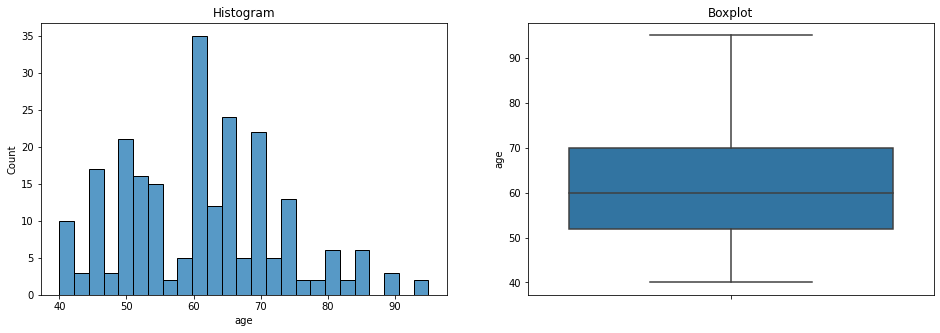

skewness: 0.3839199065708694
distribution is skew


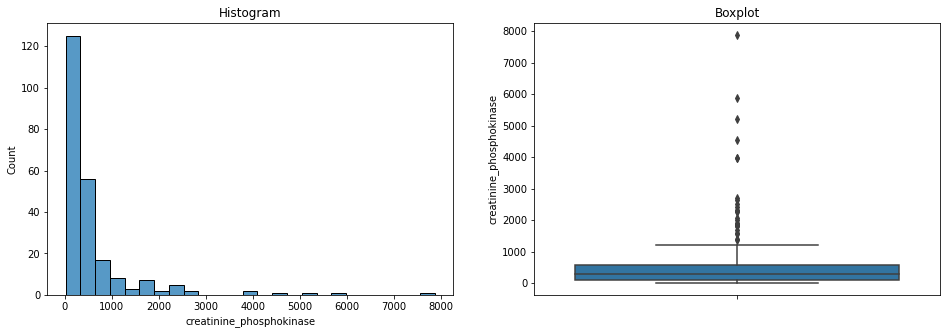

skewness: 4.072386900934546
distribution is skew


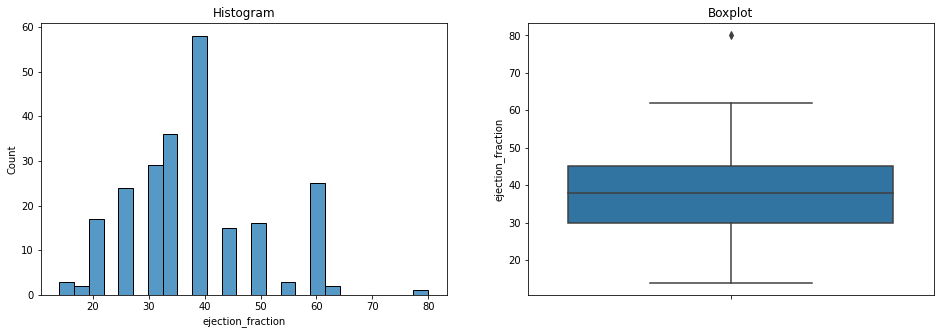

skewness: 0.5101590048140282
distribution is skew


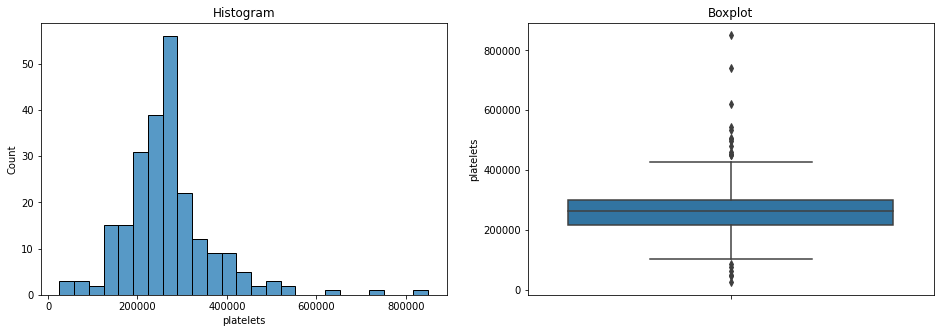

skewness: 1.6028146116734292
distribution is skew


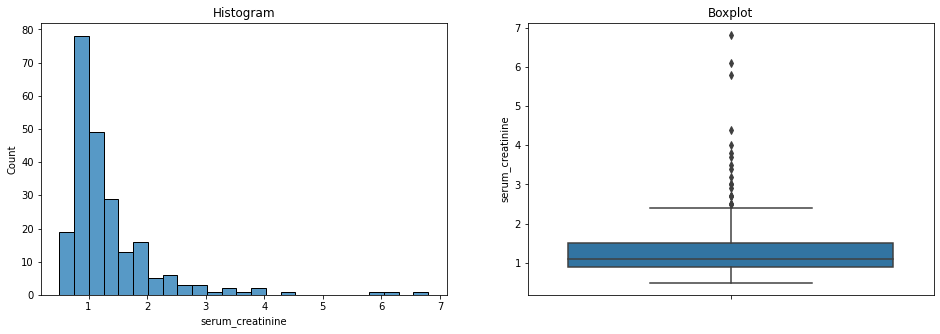

skewness: 3.3020372297709972
distribution is skew


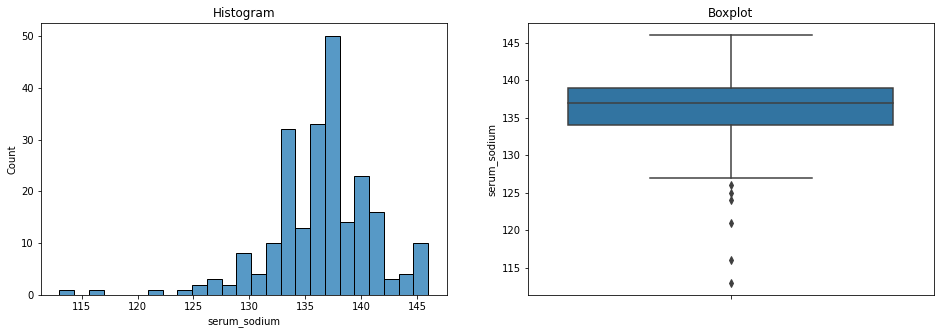

skewness: -1.1439192494189445
distribution is skew


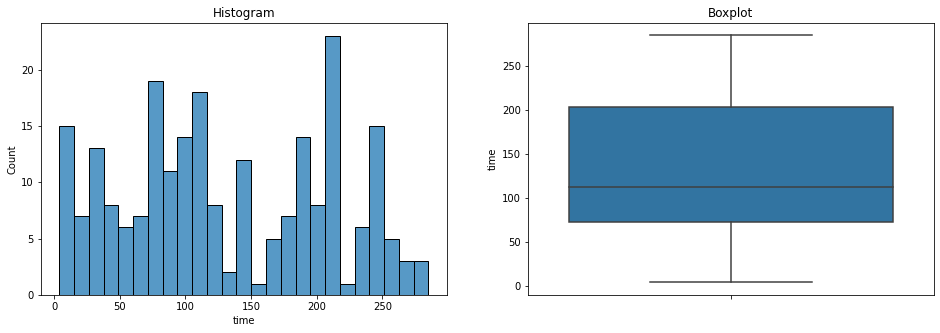

skewness: 0.13603729134766226
distribution is skew


In [90]:
# memeriksa persebaran data age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, waktu

plot(X_train, 'age')
plot(X_train, 'creatinine_phosphokinase')
plot(X_train, 'ejection_fraction')
plot(X_train, 'platelets')
plot(X_train, 'serum_creatinine')
plot(X_train, 'serum_sodium')
plot(X_train, 'time')

---
Statement Distribusi:
- feature age dan time memiliki distribusi normal.
- creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine memiliki distribusi miring ke kanan.
- serum_sodium memiliki distribusi miring ke kiri.

Statement Outliers:

- Dalam medis nilai creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine memiliki distribusi miring ke kanan, serum_sodium memiliki memiliki range yang besar yang berguna sebagai indikasi kesehatan seseorang. Oleh karena itu Data Scientist tidak melakukan perubahan terhadap nilai yang ada.

## 4. Handling Missing Value

Tidak ada missing value yang perlu dihandling.

## 5. Feature Selection

Berdasarkan EDA, data Scientist melihat adanya hubungan yang cukup kuat antara 'DEATH EVENT' dan 'age', 'ejection_fraction', 'serum_creatine', 'serum_sodium', dan 'time'.

Data Scientist akan melakukan pemeriksaan juga dengan menggunakan feature_importance_ dari Random Forest Classifier.

In [91]:
# define classifier
featimp = RandomForestClassifier()

# fit to the data
featimp.fit(X_train,y_train)

# make series
score_per_column = pd.Series(featimp.feature_importances_, index=X_train.columns)
score_per_column.sort_values(ascending=False)

time                        0.350148
serum_creatinine            0.153715
ejection_fraction           0.131444
age                         0.083854
platelets                   0.073948
creatinine_phosphokinase    0.072658
serum_sodium                0.071869
diabetes                    0.014907
high_blood_pressure         0.013422
smoking                     0.012594
sex                         0.010858
anemia                      0.010584
dtype: float64

Kita akan memakai feature 'age', 'ejection_fraction', 'serum_creatine', 'serum_sodium', dan 'time'.

In [29]:
# display X_train set

X_train.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
175,45,1,1876,1,35,0,226000.0,0.9,138,1,0,88
144,64,0,143,0,25,0,246000.0,2.4,135,1,0,214
84,45,0,615,1,55,0,222000.0,0.8,141,0,0,257
66,65,1,720,1,40,0,257000.0,1.0,136,0,0,210
243,85,0,23,0,45,0,360000.0,3.0,132,1,0,28


In [30]:
# drop less importance feature

X_train = X_train.drop(['anemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis = 1)
X_test = X_test.drop(['anemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis = 1)

# display X_train feature

X_train.head()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
175,45,35,226000.0,0.9,138,88
144,64,25,246000.0,2.4,135,214
84,45,55,222000.0,0.8,141,257
66,65,40,257000.0,1.0,136,210
243,85,45,360000.0,3.0,132,28


## 6. Split Between Numerical Columns and Categorical Columns

Data Scientist tidak menggunakan kolom kategorikal.

In [31]:
# Get Numerical Columns and Categorical Columns

num_columns = ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [32]:
# Get Numerical dataframe and Categorical dataframe

X_train_num = X_train[num_columns]

# Display X_train_num

X_train_num.head()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
175,45,35,226000.0,0.9,138,88
144,64,25,246000.0,2.4,135,214
84,45,55,222000.0,0.8,141,257
66,65,40,257000.0,1.0,136,210
243,85,45,360000.0,3.0,132,28


## 7. Feature Scaling

Feature age dan time akan discaling dengan StandardScaler, feature 'ejection_fraction',	'platelets',	'serum_creatinine',	'serum_sodium' akan discaling dengan MinMaxScaler.

skewness 1: 0.4174348426098342
skewness 2: 0.5446216140049552
skewness 3: 1.4529150858824418
skewness 3: 4.396085461671067
skewness 4: -1.0582735377250234
skewness 5: 0.1523829772227041


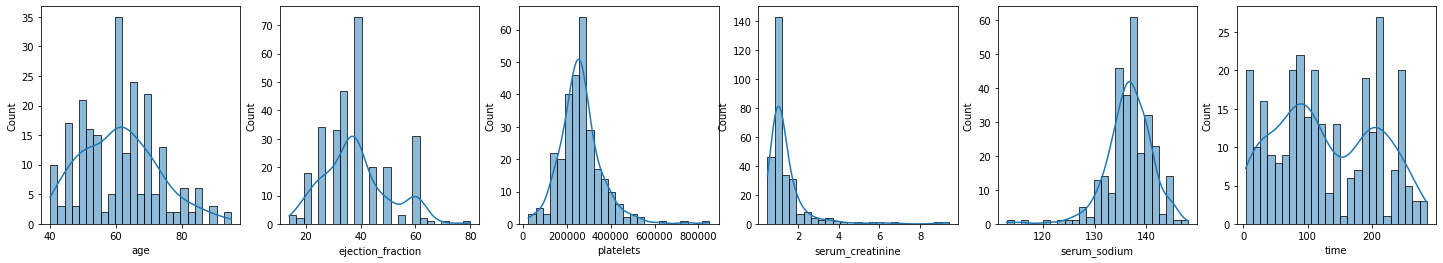

In [33]:
# melihat persebaran data pada feature

plt.figure(figsize=(25,4))

#HistV1
plt.subplot(1, 6, 1)
sns.histplot(X_train['age'], bins=25, kde=True)
print('skewness 1:', data['age'].skew())

#HistV2
plt.subplot(1, 6, 2)
sns.histplot(data['ejection_fraction'], bins=25, kde=True)
print('skewness 2:', data['ejection_fraction'].skew())

#HistV3
plt.subplot(1, 6, 3)
sns.histplot(data['platelets'], bins=25, kde=True)
print('skewness 3:', data['platelets'].skew())

#HistV4
plt.subplot(1, 6, 4)
sns.histplot(data['serum_creatinine'], bins=25, kde=True)
print('skewness 3:', data['serum_creatinine'].skew())

#HistV5
plt.subplot(1, 6, 5)
sns.histplot(data['serum_sodium'], bins=25, kde=True)
print('skewness 4:', data['serum_sodium'].skew())

#HistV6
plt.subplot(1, 6, 6)
sns.histplot(data['time'], bins=25, kde=True)
print('skewness 5:', data['time'].skew())

Feature Age dan Time akan discaling dengan Standard Scaler

In [34]:
# memisahkan skew dan normal

num_norm = ['age', 'time']
num_skew = ['ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# membuat X_train_numskew dan X_test_numskew dataframe

X_train_numnorm = X_train[num_norm]
X_test_numnorm = X_test[num_norm]

X_train_numskew = X_train[num_skew]
X_test_numskew = X_test[num_skew]

In [35]:
# scaling menggunakan StandarScaler

scaler1 = StandardScaler()
scaler1.fit(X_train_numnorm)

X_train_numnorm_scaled = scaler1.transform(X_train_numnorm)
X_test_numnorm_scaled = scaler1.transform(X_test_numnorm)

# show instance

X_test_numnorm_scaled[:3]

array([[-0.94124201, -0.16102302],
       [ 0.58694397, -0.28910952],
       [-1.36573812, -0.90392469]])

Feature ejection_fraction, serum_creatine, dan serum_sodium akan discaling dengan MinMaxScaler

In [36]:
# scaling menggunakan MinMaxScaler

scaler2 = MinMaxScaler()
scaler2.fit(X_train_numskew)

X_train_numskew_scaled = scaler2.transform(X_train_numskew)
X_test_numskew_scaled = scaler2.transform(X_test_numskew)

# show instance

X_test_numskew_scaled[:3]

array([[0.46969697, 0.19262941, 0.06349206, 0.63636364],
       [0.16666667, 0.33931386, 0.25396825, 0.51515152],
       [0.16666667, 0.44235665, 0.07936508, 0.78787879]])

## 8. Feature Encoding

Data scientist tidak memasukan feature kategorikal.

## 9. Concate Between Numerical Columns and Categorical Columns

In [37]:
# menggabungkan feature numerik yang discaling dengan StandardScaler dan MinMaxScaler

X_train_final = np.concatenate([X_train_numnorm_scaled,X_train_numskew_scaled], axis = 1)
X_test_final = np.concatenate([X_test_numnorm_scaled,X_test_numskew_scaled], axis = 1)

# show X_train_final

X_train_final

array([[-1.36573812, -0.54528251,  0.31818182,  0.24354467,  0.06349206,
         0.75757576],
       [ 0.24734708,  1.06860733,  0.16666667,  0.26779004,  0.3015873 ,
         0.66666667],
       [-1.36573812,  1.61937925,  0.62121212,  0.2386956 ,  0.04761905,
         0.84848485],
       ...,
       [-0.94124201,  0.56907   ,  0.39393939,  0.28476179,  0.03174603,
         0.51515152],
       [-1.36573812, -0.89111604,  0.31818182,  0.43629531,  0.07936508,
         0.96969697],
       [-0.0922498 , -1.28818418,  0.36363636,  0.36840829,  0.3968254 ,
         0.87878788]])

## 10. Handling Unbalance Target on Train-Set

Handling Unbalance Target on Train Set membuat precision, recall, dan f1 score pada kategori 1 menjadi 0 sehingga tidak dilakukan Handling Unbalance Target.

In [38]:
# # Handling Unbalance Target on Train-Set

# smote = SMOTE(k_neighbors=5, random_state=21)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# # show y_train_balanced

# y_train_balanced.value_counts()

# VI. Model Definition

## 1. Default Random Forest Classifier

In [39]:
# Default Random Forest Classifier

mod_RFC = RandomForestClassifier(random_state = 15)

## 2. Default Gradient Boost

In [40]:
# Default Gradient Boost

mod_GBC = GradientBoostingClassifier(random_state = 30)

---
Statement:

- Datascientist menggunakan 2 model dari ensemble learning yaitu Random Forest Classifier dan Default Gradient Boosting untuk mendapatkan hasil terbaik.

Terminologi:

- Ensemble learning adalah cara sebuah algoritma mempelajari data dengan menggunakan kombinasi dari beberapa algoritma atau model untuk mendapatkan output dengan akurasi yang lebih tinggi jika dibandingkan dengan menggunakan satu algoritma atau model saja. 

# VII. Model Training

## 1. Hipertuning Random Forest Classifier

In [41]:
# Scoring Random Forest Classifier Default

scoresRFC = cross_val_score(mod_RFC, X_train, y_train, cv=5)

print('{:.2f} +/- {:.2f}'.format(scoresRFC.mean(), scoresRFC.std()))

0.82 +/- 0.02


In [42]:
# Make grid_search parameter

param_grid_RFC = [{'n_estimators': [50, 100, 150, 200, 300, 400]}]

In [45]:
# grid_search for Random Forest Classifier Model

%%time
grid_search = GridSearchCV(estimator= mod_RFC, param_grid = param_grid_RFC, cv = 5, verbose = 2)

# fit grid seach model

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.2s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.5s
[CV] END ...................................n_estimators=100; total time=   0.5s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=150; total time=   0.2s
[CV] END ...................................n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15),
             param_grid=[{'n_estimators': [50, 100, 150, 200, 300, 400]}],
             verbose=2)

In [46]:
# check best_params for model

grid_search.best_params_

{'n_estimators': 300}

Data Scientist melakukan hipertuning terhadap n_estimator. Dan mendapatkan best_params terbaik di n_estimator 300.

In [47]:
# membuat model baru mod_RFC2

mod_RFC2 = grid_search.best_estimator_

In [48]:
# melakukan predict dengan mod_RFC2

y_pred_RFC2_test = mod_RFC2.predict(X_test)
y_pred_RFC2_train = mod_RFC2.predict(X_train)

In [49]:
# Scoring Random Forest Classifier

scoresRFC2 = cross_val_score(mod_RFC2, X_train, y_train, cv=5)

print('{:.2f} +/- {:.2f}'.format(scoresRFC2.mean(), scoresRFC.std()))

0.83 +/- 0.02


Rata-rata score mod_RFC2 bertambah 0.01 setelah dihipertuning dibandingkan mod_RFC.

---
Statement:
- Data scientist melakukan tuning n_estimator dan mendapatkan scoring akhir 0.83 +/- 0.02.

## 2. Hipertuning Gradient Boosting Classifier

In [50]:
# Scoring Gradient Boosting Classifier Default

scoresGBC = cross_val_score(mod_GBC, X_train, y_train, cv=5)

print('{:.2f} +/- {:.2f}'.format(scoresGBC.mean(), scoresGBC.std()))

0.83 +/- 0.03


In [51]:
# Make grid_search parameter

param_grid_GBC = [{'n_estimators': [100, 150, 200, 300]}]

In [52]:
# grid_search for Gradient Boosting Classifier Model

%%time
grid_search = GridSearchCV(estimator= mod_GBC, param_grid = param_grid_RFC, cv = 5, verbose = 2)

# fit grid seach model

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=150; total time=   0.1s
[CV] END ...................................n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=30),
             param_grid=[{'n_estimators': [50, 100, 150, 200, 300, 400]}],
             verbose=2)

In [53]:
# melihat best_params

grid_search.best_params_

{'n_estimators': 50}

Data Scientist melakukan hipertuning terhadap n_estimator. Dan mendapatkan best_params terbaik di n_estimator 50.

In [54]:
# membuat model baru mod_GBC2

mod_GBC2 = grid_search.best_estimator_

In [55]:
# melakukan predict dengan mod_GBC2

y_pred_GBC2_test = mod_GBC2.predict(X_test)
y_pred_GBC2_train = mod_GBC2.predict(X_train)

In [56]:
# Scoring Random Forest Classifier

scoresRFC2 = cross_val_score(mod_GBC2, X_train, y_train, cv=5)

print('{:.2f} +/- {:.2f}'.format(scoresRFC2.mean(), scoresRFC.std()))

0.84 +/- 0.02


Rata-rata score mod_GBC2 bertambah 0.01 dan standar deviasi berkurang 0.01 setelah dihipertuning dibandingkan mod_GBC.

---
Statement:
- Data scientist melakukan tuning n_estimator dan mendapatkan scoring akhir 0.84 +/- 0.02.

# VIII. Model Evaluation

## 1. RandomForestClassifier

accuracy score train :  1.0
accuracy score test :  0.8275862068965517 

---- confusion matrix train and mod_RFC2 ----


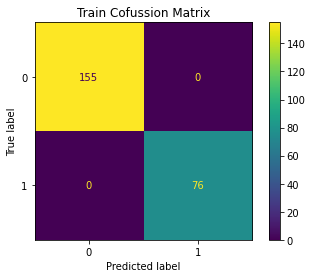

---- confusion matrix train mod_RFC2 ----


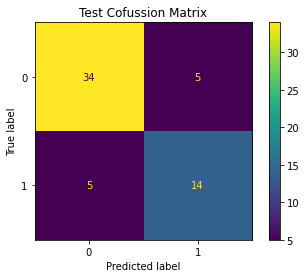

---- classification report train mod_RBC2 ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        76

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231
 

---- classification report test mod_RBC2 ----
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.74      0.74      0.74        19

    accuracy                           0.83        58
   macro avg       0.80      0.80      0.80        58
weighted avg       0.83      0.83      0.83        58



In [57]:
# evaluasi train mod_RFC2

print('accuracy score train : ',accuracy_score(y_pred_RFC2_train, y_train))
print('accuracy score test : ',accuracy_score(y_pred_RFC2_test, y_test), '\n')

print('---- confusion matrix train and mod_RFC2 ----')

cm = confusion_matrix(y_train, y_pred_RFC2_train, labels=mod_RFC2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod_RFC2.classes_)

disp.plot()
plt.title('Train Cofussion Matrix')
plt.show()

print('---- confusion matrix train mod_RFC2 ----')

cm = confusion_matrix(y_test, y_pred_RFC2_test, labels=mod_RFC2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod_RFC2.classes_)

disp.plot()
plt.title('Test Cofussion Matrix')
plt.show()

print('---- classification report train mod_RBC2 ----')
print(classification_report(y_pred_RFC2_train,y_train), '\n')

print('---- classification report test mod_RBC2 ----')
print(classification_report(y_pred_RFC2_test,y_test))

Evaluasi Train & Test mod_RFC2:

- __Accuracy train adalah 1 dan accuracy test adalah 0.827.__ Model tergolong baik namun overfit.

- __Confusion matrix test__ menunjukkan model benar memprediksi 34 pasien yang tidak akan meninggal (TP) dan 14 pasien yang akan meninggal (TN) namun salah memprediksi 5 yang tidak akan meninggal menjadi akan meninggal (FN) dan 5 yang akan meninggal menjadi tidak akan meninggal (FP). Kesalahahan prediksi False Positif atau kesalahan prediksi terhadap pasien yang akan meninggal sangat berbahaya.

- __Precision test untuk 0__ yaitu 0.87(87%) yg artinya meprediksi dengan benar 87% pasien tidak akan meninggal dibandingkan seluruh prediksi pasien yang tidak akan meninggal dan gagal memprediksi 13 %. __Precision test untuk 1__ yaitu 0.74 yg artinya meprediksi dengan benar 74% pasien yang akan meninggal dibandingkan seluruh prediksi pasien yang akan meninggal dan salah memprediksi 26%.

- __Recall test untuk 0__ yaitu 0.87(87%) yg artinya meprediksi dengan benar 87% pasien tidak akan meninggal dibandingkan seluruh pasien yang tidak akan meninggal dan gagal memprediksi 13%. __Recall test untuk 1__ yaitu 0.74 yg artinya meprediksi dengan benar 74% orang yang akan meninggal dibandingkan seluruh pasien yang akan meninggal dan salah memprediksi 26%.

- __F1score__ adalah rata-rata dari nilai precision test dan recall test. F1score untuk pasien yang tidak akan meninggal adalah 0.87 (87%) dan untuk pasien yang akan akan meninggal adalah 0.74 (74%).

- Untuk bidang medis, nilai F1score yang bagus adalah di atas 90 %. Kesalahan prediksi terhadap pasien yang seharusnya akan meninggal sangat berbahaya karena pasien tidak mendapatkan perawatan atas kondisi tubuhnya.

- Kurangnya kemampuan Model memprediksi pasien yang akan meninggal disebabkan dataset contoh yang kurang seimbang antara pasien yang akan meninggal dan yang tidak akan meninggal sehingga model kurang belajar. Untuk pengembangan selanjutnya Data Scientist akan mencoba melakukan feature engineering terhadap dataset, mengeksplorasi model lain dan parameternya.

## 2. GradientBoostingClassifier

accuracy score train :  0.9826839826839827
accuracy score test :  0.8275862068965517 

---- confusion matrix train and mod_GBC2 ----


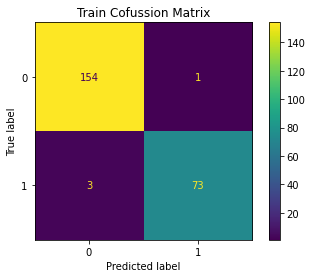

---- confusion matrix train mod_GBC2 ----


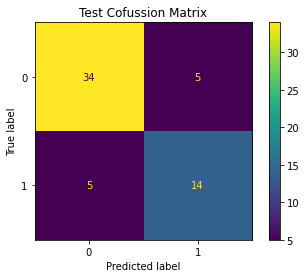

---- classification report train mod_GBC2 ----
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.96      0.99      0.97        74

    accuracy                           0.98       231
   macro avg       0.98      0.98      0.98       231
weighted avg       0.98      0.98      0.98       231
 

---- classification report test mod_GBC2 ----
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.74      0.74      0.74        19

    accuracy                           0.83        58
   macro avg       0.80      0.80      0.80        58
weighted avg       0.83      0.83      0.83        58



In [58]:
# evaluasi train mod_GBC2

print('accuracy score train : ',accuracy_score(y_pred_GBC2_train, y_train))
print('accuracy score test : ',accuracy_score(y_pred_GBC2_test, y_test), '\n')

print('---- confusion matrix train and mod_GBC2 ----')

cm = confusion_matrix(y_train, y_pred_GBC2_train, labels=mod_GBC2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod_GBC2.classes_)

disp.plot()
plt.title('Train Cofussion Matrix')
plt.show()

print('---- confusion matrix train mod_GBC2 ----')

cm = confusion_matrix(y_test, y_pred_GBC2_test, labels=mod_GBC2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mod_GBC2.classes_)

disp.plot()
plt.title('Test Cofussion Matrix')
plt.show()

print('---- classification report train mod_GBC2 ----')
print(classification_report(y_pred_GBC2_train,y_train), '\n')

print('---- classification report test mod_GBC2 ----')
print(classification_report(y_pred_GBC2_test,y_test))

Evaluasi Train & Test mod_GBC2:

- __Accuracy train adalah 0.98 dan accuracy test adalah 0.827.__ Model tergolong baik namun goodfit.

- __Confusion matrix test__ menunjukkan model benar memprediksi 34 pasien yang tidak akan meninggal (TP) dan 14 pasien yang akan meninggal (TN) namun salah memprediksi 5 yang tidak akan meninggal menjadi akan meninggal (FN) dan 5 yang akan meninggal menjadi tidak akan meninggal (FP). Kesalahahan prediksi False Positif atau kesalahan prediksi terhadap pasien yang akan meninggal sangat berbahaya.

- __Precision test untuk 0__ yaitu 0.74(74%) yg artinya meprediksi dengan benar 74% pasien tidak akan meninggal dibandingkan seluruh prediksi pasien yang tidak akan meninggal dan gagal memprediksi 26 %. __Precision test untuk 1__ yaitu 0.74 yg artinya meprediksi dengan benar 74% pasien yang akan meninggal dibandingkan seluruh prediksi pasien yang akan meninggal dan salah memprediksi 26%.

- __Recall test untuk 0__ yaitu 74(74%) yg artinya meprediksi dengan benar 74% pasien tidak akan meninggal dibandingkan seluruh pasien yang tidak akan meninggal dan gagal memprediksi 26%. __Recall test untuk 1__ yaitu 0.74 yg artinya meprediksi dengan benar 74% orang yang akan meninggal dibandingkan seluruh pasien yang akan meninggal dan salah memprediksi 26%.

- __F1score test__ adalah rata-rata dari nilai precision test dan recall test. F1score untuk pasien yang tidak akan meninggal adalah 0.87 (87%) dan untuk pasien yang akan akan meninggal adalah 0.74 (74%).

- Untuk bidang medis, nilai F1score yang bagus adalah di atas 90 %. Kesalahan prediksi terhadap pasien yang seharusnya akan meninggal sangat berbahaya karena pasien tidak mendapatkan perawatan atas kondisi tubuhnya.

- Kurangnya kemampuan Model memprediksi pasien yang akan meninggal disebabkan dataset contoh yang kurang seimbang antara pasien yang akan meninggal dan yang tidak akan meninggal sehingga model kurang belajar. Untuk pengembangan selanjutnya Data Scientist akan mencoba melakukan feature engineering terhadap dataset, mengeksplorasi model lain dan parameternya.


---
Statement:
1. Untuk bidang medis, nilai F1score yang bagus adalah di atas 90 %. Kesalahan prediksi terhadap pasien yang seharusnya akan meninggal sangat berbahaya karena pasien tidak mendapatkan perawatan atas kondisi tubuhnya.
2. Model menggunakan RandomForestClassifier atau mod_RFC2 memiliki f1score 87% untuk pasien yang tidak akan meninggal dan f1score 74 % untuk pasien yang akan meninggal. 
3. Model menggunakan GradientBoostingClassifier atau mod_GBC2 memiliki f1score 87% untuk pasien yang tidak akan meninggal dan f1score 74 % untuk pasien yang akan meninggal.
4. mod_RFC2 dan mod_GBC2 memiliki ketepatan yang sama.
5. Kurangnya kemampuan Model memprediksi pasien yang akan meninggal disebabkan dataset contoh yang kurang seimbang antara pasien yang akan meninggal dan yang tidak akan meninggal sehingga model kurang belajar. Untuk pengembangan selanjutnya Data Scientist akan mencoba melakukan feature engineering terhadap dataset, mengeksplorasi model selain RandomForestClassifier dan GradientBoostingClassifier dan melakukan hipertuning.

# IX. Model Inference

In [59]:
# show data inference

data_i.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,72,0,211,0,25,0,274000.0,1.2,134,0,0,207,0
1,42,0,64,0,40,0,189000.0,0.7,140,1,0,245,0
2,49,0,972,1,35,1,268000.0,0.8,130,0,0,187,0
3,59,1,176,1,25,0,221000.0,1.0,136,1,1,150,1
4,58,0,132,1,38,1,253000.0,1.0,139,1,0,230,0


In [60]:
# scaling data

data_i_numskew = data_i[num_skew]
data_i_numnorm = data_i[num_norm]

# scaling data_i_numnorm dengan StandardSaler
data_i_numnorm_scaled = scaler1.transform(data_i_numnorm)

# scaling data_i_numskew dengan MinMaxScaler
data_i_numskew_scaled = scaler2.transform(data_i_numskew)

# concate data
data_i_final = np.concatenate([data_i_numnorm_scaled, data_i_numskew_scaled], axis = 1)

data_i_final

array([[ 0.92654085,  0.97894678,  0.16666667,  0.30173354,  0.11111111,
         0.63636364],
       [-1.62043578,  1.46567546,  0.39393939,  0.19869075,  0.03174603,
         0.81818182],
       [-1.02614123,  0.72277379,  0.31818182,  0.29445993,  0.04761905,
         0.51515152],
       [-0.17714902,  0.24885376,  0.16666667,  0.23748333,  0.07936508,
         0.6969697 ],
       [-0.26204824,  1.27354572,  0.36363636,  0.27627591,  0.07936508,
         0.78787879],
       [-0.94124201,  1.40163221,  0.31818182,  0.40841314,  0.06349206,
         0.81818182],
       [-1.62043578, -0.7246036 ,  0.39393939,  0.25687962,  0.11111111,
         0.81818182],
       [-0.51674591,  1.52971871,  0.39393939,  0.37689417,  0.11111111,
         0.66666667],
       [ 1.5208354 , -0.673369  ,  0.54545455,  0.17808219,  0.20634921,
         0.60606061],
       [-0.77144357, -0.23787492,  0.24242424,  0.23384653,  0.03174603,
         0.6969697 ]])

In [61]:
# modeling and make a new dataframe

# predict with mod_RFC2 and make columns

y_i_pred_RFC2 = mod_RFC2.predict(data_i_final)
y_i_pred_RFC2_data = pd.DataFrame(y_i_pred_RFC2, columns = ['DEATH_EVENT_RFC2'])

# predict with mod_GBC2 and make columns

y_i_pred_GBC2 = mod_GBC2.predict(data_i_final)
y_i_pred_GBC2_data = pd.DataFrame(y_i_pred_GBC2, columns = ['DEATH_EVENT_GBC2'])

# make a new dataframe

presented_data_i = pd.concat([data_i, y_i_pred_RFC2_data, y_i_pred_GBC2_data], axis=1)
presented_data_i

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT_RFC2,DEATH_EVENT_GBC2
0,72,0,211,0,25,0,274000.0,1.2,134,0,0,207,0,1,1
1,42,0,64,0,40,0,189000.0,0.7,140,1,0,245,0,1,1
2,49,0,972,1,35,1,268000.0,0.8,130,0,0,187,0,1,1
3,59,1,176,1,25,0,221000.0,1.0,136,1,1,150,1,1,1
4,58,0,132,1,38,1,253000.0,1.0,139,1,0,230,0,1,1
5,50,1,298,0,35,0,362000.0,0.9,140,1,1,240,0,1,1
6,42,0,102,1,40,0,237000.0,1.2,140,1,0,74,0,1,1
7,55,1,170,1,40,0,336000.0,1.2,135,1,0,250,0,1,1
8,79,1,55,0,50,1,172000.0,1.8,133,1,0,78,0,1,1
9,52,0,132,0,30,0,218000.0,0.7,136,1,1,112,0,1,1


Dari 10 data inference ada 9 salah prediksi yang dilakukan oleh mod_RFC2 dan 9 salah prediksi yang dilakukan oleh mod_GBC2.

---
Statement:
- Dari 10 data inference ada 9 salah prediksi yang dilakukan oleh mod_RFC2 dan 9 salah prediksi yang dilakukan oleh mod_GBC2. Hasil cukup buruk yang dimungkinkan karena f1 score dari kedua model masih dibawah 90%.

# X. Pengambilan Kesimpulan

Dari proses EDA ditemukan beberapa hal:
- Data Scientist melakukan evaluasi terhadap fitur dengan countplot, histplot, dan cmap.
- Data Scientist menemukan kolom age, ejection_fraction, platelets, serum_creatine, serum_sodium, dan time memiliki pengaruh dalam memprediksi tingkat kematian. Pasien yang berumur 60 tahun ke atas memiliki tingkat kematian lebih tinggi. Pasien yang diminta melakukan follow up lebih dekat jangka waktunya memiliki tingkat kematian lebih tinggi. Begitu pula dengan pasien yang berada diluar batas normal kadar ejection_fraction, platelets, serum_creatine, serum_sodium.

Dari preprocessing ditemukan beberapa hal:
- Tidak ada outlier pada kolom age dan time.
- Outlier yang ada pada ejection_fraction, platelets, serum_creatine, serum_sodium adalah outlier natural sehingga tidak dilakukan handling.
- Data Scientist melakukan StandardScaling pada kolom age dan time serta MinMaxScaling pada kolom ejection_fraction, platelets, serum_creatine, serum_sodium.

Dari proses model evaluation dan analysis didapatkan:
- Data Scientist menggunakan model Random Forest Classifier dan Gradient Bosting Classifier untuk meningkatkan kinerja model.
- Model Random Forest Classifier dan Gradient Boosting Classifier yang telah dituning memiliki nilai precision, recall, dan f1score yang sama yaitu 74% untuk memprediksi apakah seorang pasien akan meninggal atau tidak. Hal ini mungkin disebabkan karena data yang kurang balance.
- Kedua model belum memenuhi treshold model dunia medis yaitu sama dengan atau di atas 90%.

Insight:
- Dibutuhkan data yang lebih seimbang untuk pasien yang akhirnya meninggal setelah melakukan pemeriksaan.
- Data Scientist perlu mencoba model lainnya.

# XI. Conceptual Problems

Pertanyaan:

1. Apakah yang dimaksud dengan Bagging?

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

Jawab 1

Bagging, juga dikenal sebagai bootstrap aggregating, adalah proses dengan menggunakan beberapa model dari algoritma yang sama, dan melatih setiap model pada sampel berbeda dari dataset yang sama. Prediksi yang dibuat oleh setiap model kemudian digabungkan menggunakan statistik sederhana, seperti voting atau rata-rata.

Jawab 2

Random Forest adalah salah satu algoritma bagging yang pengertiannya sudah dijelaskan di Jawab 1.

Algoritma boosting yang Data Scientist pilih adalah Gradient Boost.
Gradient boost sebagai anggota dari algoritma boosting adalah variasi bagging, di mana setiap model individu dibangun secara berurutan, mengulangi yang sebelumnya. Dalam prosesnya, setiap titik data yang salah diklasifikasikan oleh model sebelumnya ditekankan dalam model berikutnya. Hal ini dilakukan untuk meningkatkan akurasi model secara keseluruhan.